In [63]:

import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [72]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True, batch_size = 128,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, batch_size = 128,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


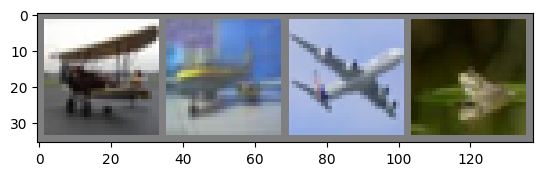

plane plane plane frog 


In [73]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [118]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 32, 3)
        self.conv3 = nn.Conv2d(32, 16, 2)
        self.fc1 = nn.Linear(16 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [119]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.00005)

In [120]:
for epoch in tqdm(range(50)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = torch.tensor(inputs.to(device))
        labels = torch.tensor(labels.to(device))
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\Jun Khai\AppData\Local\Temp\ipykernel_24752\2089865247.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs.to(device))
C:\Users\Jun Khai\AppData\Local\Temp\ipykernel_24752\2089865247.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels.to(device))


[1,  2000] loss: 2.162
[1,  4000] loss: 2.000
[1,  6000] loss: 1.923
[1,  8000] loss: 1.846
[1, 10000] loss: 1.799
[1, 12000] loss: 1.781


  2%|▏         | 1/50 [00:31<25:51, 31.67s/it]

[2,  2000] loss: 1.724
[2,  4000] loss: 1.705
[2,  6000] loss: 1.678
[2,  8000] loss: 1.677
[2, 10000] loss: 1.663
[2, 12000] loss: 1.633


  4%|▍         | 2/50 [01:03<25:34, 31.96s/it]

[3,  2000] loss: 1.610
[3,  4000] loss: 1.588
[3,  6000] loss: 1.594
[3,  8000] loss: 1.583
[3, 10000] loss: 1.576
[3, 12000] loss: 1.563


  6%|▌         | 3/50 [01:35<25:03, 31.99s/it]

[4,  2000] loss: 1.540
[4,  4000] loss: 1.553
[4,  6000] loss: 1.505
[4,  8000] loss: 1.522
[4, 10000] loss: 1.513
[4, 12000] loss: 1.498


  8%|▊         | 4/50 [02:07<24:33, 32.04s/it]

[5,  2000] loss: 1.477
[5,  4000] loss: 1.485
[5,  6000] loss: 1.467
[5,  8000] loss: 1.459
[5, 10000] loss: 1.435
[5, 12000] loss: 1.459


 10%|█         | 5/50 [02:39<24:01, 32.03s/it]

[6,  2000] loss: 1.450
[6,  4000] loss: 1.434
[6,  6000] loss: 1.423
[6,  8000] loss: 1.409
[6, 10000] loss: 1.410
[6, 12000] loss: 1.379


 12%|█▏        | 6/50 [03:11<23:24, 31.93s/it]

[7,  2000] loss: 1.382
[7,  4000] loss: 1.379
[7,  6000] loss: 1.380
[7,  8000] loss: 1.372
[7, 10000] loss: 1.365
[7, 12000] loss: 1.373


 14%|█▍        | 7/50 [03:43<22:56, 32.02s/it]

[8,  2000] loss: 1.343
[8,  4000] loss: 1.346
[8,  6000] loss: 1.363
[8,  8000] loss: 1.324
[8, 10000] loss: 1.339
[8, 12000] loss: 1.342


 16%|█▌        | 8/50 [04:15<22:21, 31.94s/it]

[9,  2000] loss: 1.338
[9,  4000] loss: 1.313
[9,  6000] loss: 1.303
[9,  8000] loss: 1.304
[9, 10000] loss: 1.304
[9, 12000] loss: 1.304


 18%|█▊        | 9/50 [04:47<21:46, 31.87s/it]

[10,  2000] loss: 1.287
[10,  4000] loss: 1.294
[10,  6000] loss: 1.301
[10,  8000] loss: 1.287
[10, 10000] loss: 1.278
[10, 12000] loss: 1.257


 20%|██        | 10/50 [05:19<21:16, 31.90s/it]

[11,  2000] loss: 1.267
[11,  4000] loss: 1.247
[11,  6000] loss: 1.255
[11,  8000] loss: 1.244
[11, 10000] loss: 1.255
[11, 12000] loss: 1.267


 22%|██▏       | 11/50 [05:51<20:47, 31.99s/it]

[12,  2000] loss: 1.257
[12,  4000] loss: 1.218
[12,  6000] loss: 1.236
[12,  8000] loss: 1.233
[12, 10000] loss: 1.228
[12, 12000] loss: 1.210


 24%|██▍       | 12/50 [06:23<20:13, 31.93s/it]

[13,  2000] loss: 1.210
[13,  4000] loss: 1.206
[13,  6000] loss: 1.221
[13,  8000] loss: 1.202
[13, 10000] loss: 1.203
[13, 12000] loss: 1.201


 26%|██▌       | 13/50 [06:55<19:40, 31.90s/it]

[14,  2000] loss: 1.195
[14,  4000] loss: 1.178
[14,  6000] loss: 1.206
[14,  8000] loss: 1.174
[14, 10000] loss: 1.191
[14, 12000] loss: 1.176


 28%|██▊       | 14/50 [07:26<19:06, 31.84s/it]

[15,  2000] loss: 1.161
[15,  4000] loss: 1.153
[15,  6000] loss: 1.152
[15,  8000] loss: 1.168
[15, 10000] loss: 1.172
[15, 12000] loss: 1.169


 30%|███       | 15/50 [07:58<18:31, 31.76s/it]

[16,  2000] loss: 1.126
[16,  4000] loss: 1.154
[16,  6000] loss: 1.112
[16,  8000] loss: 1.155
[16, 10000] loss: 1.155
[16, 12000] loss: 1.148


 32%|███▏      | 16/50 [08:30<18:00, 31.79s/it]

[17,  2000] loss: 1.141
[17,  4000] loss: 1.123
[17,  6000] loss: 1.122
[17,  8000] loss: 1.128
[17, 10000] loss: 1.121
[17, 12000] loss: 1.108


 34%|███▍      | 17/50 [09:01<17:27, 31.75s/it]

[18,  2000] loss: 1.101
[18,  4000] loss: 1.099
[18,  6000] loss: 1.113
[18,  8000] loss: 1.104
[18, 10000] loss: 1.120
[18, 12000] loss: 1.099


 36%|███▌      | 18/50 [09:34<16:59, 31.86s/it]

[19,  2000] loss: 1.094
[19,  4000] loss: 1.093
[19,  6000] loss: 1.088
[19,  8000] loss: 1.072
[19, 10000] loss: 1.111
[19, 12000] loss: 1.069


 38%|███▊      | 19/50 [10:06<16:28, 31.90s/it]

[20,  2000] loss: 1.094
[20,  4000] loss: 1.075
[20,  6000] loss: 1.084
[20,  8000] loss: 1.084
[20, 10000] loss: 1.044
[20, 12000] loss: 1.069


 40%|████      | 20/50 [10:38<15:58, 31.96s/it]

[21,  2000] loss: 1.061
[21,  4000] loss: 1.065
[21,  6000] loss: 1.045
[21,  8000] loss: 1.065
[21, 10000] loss: 1.056
[21, 12000] loss: 1.076


 42%|████▏     | 21/50 [11:10<15:28, 32.01s/it]

[22,  2000] loss: 1.049
[22,  4000] loss: 1.059
[22,  6000] loss: 1.036
[22,  8000] loss: 1.047
[22, 10000] loss: 1.040
[22, 12000] loss: 1.050


 44%|████▍     | 22/50 [11:42<14:55, 31.97s/it]

[23,  2000] loss: 1.039
[23,  4000] loss: 1.043
[23,  6000] loss: 1.034
[23,  8000] loss: 1.041
[23, 10000] loss: 1.010
[23, 12000] loss: 1.036


 46%|████▌     | 23/50 [12:14<14:24, 32.02s/it]

[24,  2000] loss: 1.005
[24,  4000] loss: 1.026
[24,  6000] loss: 1.024
[24,  8000] loss: 1.027
[24, 10000] loss: 1.022
[24, 12000] loss: 1.026


 48%|████▊     | 24/50 [12:46<13:50, 31.95s/it]

[25,  2000] loss: 1.004
[25,  4000] loss: 0.995
[25,  6000] loss: 1.008
[25,  8000] loss: 1.026
[25, 10000] loss: 1.005
[25, 12000] loss: 1.019


 50%|█████     | 25/50 [13:18<13:18, 31.95s/it]

[26,  2000] loss: 0.987
[26,  4000] loss: 0.995
[26,  6000] loss: 0.995
[26,  8000] loss: 1.014
[26, 10000] loss: 1.015
[26, 12000] loss: 0.988


 52%|█████▏    | 26/50 [13:49<12:45, 31.91s/it]

[27,  2000] loss: 0.989
[27,  4000] loss: 0.995
[27,  6000] loss: 0.973
[27,  8000] loss: 0.998
[27, 10000] loss: 0.996
[27, 12000] loss: 0.987


 54%|█████▍    | 27/50 [14:21<12:13, 31.90s/it]

[28,  2000] loss: 0.985
[28,  4000] loss: 0.968
[28,  6000] loss: 0.969
[28,  8000] loss: 0.989
[28, 10000] loss: 0.989
[28, 12000] loss: 0.974


 56%|█████▌    | 28/50 [14:53<11:41, 31.88s/it]

[29,  2000] loss: 0.954
[29,  4000] loss: 0.967
[29,  6000] loss: 0.965
[29,  8000] loss: 0.973
[29, 10000] loss: 0.979
[29, 12000] loss: 0.971


 58%|█████▊    | 29/50 [15:25<11:09, 31.86s/it]

[30,  2000] loss: 0.966
[30,  4000] loss: 0.964
[30,  6000] loss: 0.968
[30,  8000] loss: 0.951
[30, 10000] loss: 0.948
[30, 12000] loss: 0.963


 60%|██████    | 30/50 [15:59<10:47, 32.38s/it]

[31,  2000] loss: 0.930
[31,  4000] loss: 0.938
[31,  6000] loss: 0.953
[31,  8000] loss: 0.973
[31, 10000] loss: 0.949
[31, 12000] loss: 0.968


 62%|██████▏   | 31/50 [16:31<10:16, 32.45s/it]

[32,  2000] loss: 0.932
[32,  4000] loss: 0.933
[32,  6000] loss: 0.929
[32,  8000] loss: 0.934
[32, 10000] loss: 0.956
[32, 12000] loss: 0.970


 64%|██████▍   | 32/50 [17:03<09:42, 32.39s/it]

[33,  2000] loss: 0.944
[33,  4000] loss: 0.937
[33,  6000] loss: 0.924
[33,  8000] loss: 0.939
[33, 10000] loss: 0.934
[33, 12000] loss: 0.927


 66%|██████▌   | 33/50 [17:36<09:11, 32.44s/it]

[34,  2000] loss: 0.937
[34,  4000] loss: 0.915
[34,  6000] loss: 0.924
[34,  8000] loss: 0.941
[34, 10000] loss: 0.925
[34, 12000] loss: 0.926


 68%|██████▊   | 34/50 [18:08<08:38, 32.39s/it]

[35,  2000] loss: 0.915
[35,  4000] loss: 0.923
[35,  6000] loss: 0.904
[35,  8000] loss: 0.930
[35, 10000] loss: 0.925
[35, 12000] loss: 0.922


 70%|███████   | 35/50 [18:41<08:06, 32.41s/it]

[36,  2000] loss: 0.888
[36,  4000] loss: 0.904
[36,  6000] loss: 0.927
[36,  8000] loss: 0.927
[36, 10000] loss: 0.905
[36, 12000] loss: 0.915


 72%|███████▏  | 36/50 [19:13<07:33, 32.37s/it]

[37,  2000] loss: 0.909
[37,  4000] loss: 0.899
[37,  6000] loss: 0.894
[37,  8000] loss: 0.906
[37, 10000] loss: 0.902
[37, 12000] loss: 0.910


 74%|███████▍  | 37/50 [19:46<07:01, 32.46s/it]

[38,  2000] loss: 0.900
[38,  4000] loss: 0.886
[38,  6000] loss: 0.909
[38,  8000] loss: 0.886
[38, 10000] loss: 0.903
[38, 12000] loss: 0.891


 76%|███████▌  | 38/50 [20:18<06:30, 32.56s/it]

[39,  2000] loss: 0.880
[39,  4000] loss: 0.881
[39,  6000] loss: 0.891
[39,  8000] loss: 0.903
[39, 10000] loss: 0.896
[39, 12000] loss: 0.884


 78%|███████▊  | 39/50 [20:51<05:59, 32.72s/it]

[40,  2000] loss: 0.893


In [92]:
PATH = './cifar_net_10_719_epoch.pth'
torch.save(net.state_dict(), PATH)

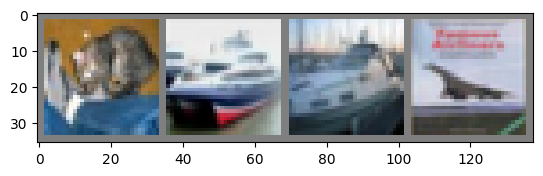

GroundTruth:  cat   ship  ship  plane


In [93]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [94]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [95]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


In [96]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 67 %


In [22]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.6 %
Accuracy for class: car   is 82.9 %
Accuracy for class: bird  is 55.9 %
Accuracy for class: cat   is 42.8 %
Accuracy for class: deer  is 50.5 %
Accuracy for class: dog   is 51.0 %
Accuracy for class: frog  is 74.9 %
Accuracy for class: horse is 66.1 %
Accuracy for class: ship  is 71.7 %
Accuracy for class: truck is 70.1 %


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

In [ ]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)